## Objective

#### It is important to know that it is NOT possible to predict if video games are violent with this dataset. Instead of that, we can only predict if a person THINKS that a video game can lead to violent behaviours. Since the target column 'Do you believe that playing violent video games can lead to aggressive behaviour in real life?' reflects a subjective opinion, it is not suitable for the prediction of the effect of video games in persons. For that reason, we will focus on predicting if a person can think that a video game leads to violent behaviour based on different aspects of their lives.

In [2]:
# Import the main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing

In [4]:
df = pd.read_csv('videogames.csv')
df.head()

,Timestamp,What is your age?,Gender,Class,City/ Residencial status,Type of Family,What type of video games do you typically play?,Name the video game you usually play,How many hours do you play Video Games in a day?,"How much time do you play ""violent"" video games specifically?",...,there are people who pushed me so far that we begin fighting,"I know that some so called ""friends"" talk about me behind my back",My friends say that I am a bit argumentative,Sometimes I lose temper for no good reason,I get into fights a little more than a normal person,sometimes I can not control the feeling to hit another person,I sometimes get too much jealous from people,I dont know why sometimes I feel bitter about things,"Have you ever been involved in delinquent behaviour? like stealing, breaking things of others",Do you believe that playing violent video games can lead to aggressive behavior in real life?
0,7-11-2023 22:16:49,20,male,12th,Lahore,joint,action,Pubg,more than 3 hour,more than 2 hour,...,Agree,Agree,Agree,Strongly disagree,Disagree,NaN,NaN,NaN,no,yes
1,7-11-2023 23:01:27,18,male,11th,Lahore,joint,action,Pubg,more than 3 hour,more than 2 hour,...,Agree,Agree,Strongly agree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,yes,yes
2,7-11-2023 23:11:33,16,male,11th,Lahore,nuclear,action,PUBG,more than 1 hour,more than 1 hour,...,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Strongly disagree,Strongly disagree,Disagree,yes,yes
3,7-11-2023 23:12:33,19,female,12th,Lahore,nuclear,word connect,word connect,less than 1 hour,less than 1 hour,...,Strongly disagree,Agree,Disagree,Disagree,Disagree,Disagree,Strongly disagree,Disagree,no,yes
4,7-11-2023 23:14:42,19,male,12th,Balochistan,joint,action,Pubg,more than 2 hour,more than 2 hour,...,Agree,Agree,Neither agree nor disagree,Disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,yes,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 43 columns):
 #   Column                                                                                         Non-Null Count  Dtype 
---  ------                                                                                         --------------  ----- 
 0   Timestamp                                                                                      147 non-null    object
 1   What is your age?                                                                              147 non-null    object
 2   Gender                                                                                         147 non-null    object
 3   Class                                                                                          147 non-null    object
 4   City/ Residencial status                                                                       147 non-null    object
 5   Type of Family               

#### Since the column names of our dataframe are very long, we are going to change the names to shorter ones in order to make the analysis process easier:

In [7]:
df = df.rename(columns = {'What is your age?': 'Age',
                         'City/ Residencial status': 'City',
                          'Type of Family': 'Family_type',
                         'What type of video games do you typically play?': 'Game_type',
                         'Name the video game you usually play ': 'Most_played_game',
                         'How many hours do you play Video Games in  a day?': 'Hours_per_day',
                         'How much time do you play "violent" video games specifically?': 'Violent_type_hours',
                         'What changes on behaviour have you experienced in yourself after playing violent video games?': 'Behaviour_changes',
                         'Some of my Friends think I am hothead': 'Impulsiveness',
                         'If I have to resort to violence to protect my rights, I will': 'Tends_to_violence',
                         'When people are especially nice to me, I wonder what they want': 'Doubt_about_others',
                         'I tell my friends openly when I disagree with them': 'Openly_disagrees',
                         'Once I became so mad, I broke things': 'Mad_rage',
                         'When people disagree with me I get into arguments': 'Arguments',
                         'When I argue I use abusive language': 'Abusive_language',
                         'I am a hot-tempered person': 'Hot_tempered',
                         'I am suspicious of strangers who are too friendly': 'Suspicious',
                         'I have threatened some people whom I know': 'Threats',
                         'I can get angry suddenly but get over it quickly': 'Burst_of_anger',
                         'If I am provoked enough, I will hit another person': 'Violent_response',
                         'When people annoy me, I openly tell them what I think of them':'Open_when_annoyed',
                         'I may hit a person for no good reason': 'Violent_impulses',
                         'Sometimes I feel I am being treated unfairly': 'Unfair_treatment',
                         'I have trouble controlling my temper': 'Temper_problems',
                         'When frustrated, I show my irritation': 'Express_irritation',
                         'Sometimes I feel people are laughing behind my back': 'Suspicion',
                         'I often disagree with people': 'Often_disagree',
                         'If somebody hits me, I hit back': 'Hits_back',
                         'I sometimes feel like exploding for no good reason': 'Unjustified_rage',
                         'I feel other people always take over the oppurtunity and I miss it': 'Overshadowed',
                         'there are people who pushed me so far that we begin fighting': 'Pushed_to_fight',
                         'I know that some so called "friends" talk about me behind my back': 'Fake_friends',
                         'My friends say that I am a bit argumentative': 'Friends_oppinion',
                         'Sometimes I lose temper for no good reason': 'Random_rage',
                         'I get into fights a little more than a normal person': 'Tends_to_fight',
                         'sometimes I can not control the feeling to hit another person ': 'Fight_impulses',
                         'I sometimes get too much jealous from people': 'Jealousy',
                         'I dont know why sometimes I feel bitter about things': 'Bitterness',
                         'Have you ever been involved in delinquent behaviour? like stealing, breaking things of others': 'Delinquent_beh',
                         'Do you believe that playing violent video games can lead to aggressive behavior in real life?': 'Are_game_violent'})

#### Now we are going to see the type of data that we have in the dataset and how many unique values we have for each column

In [9]:
# ANSI escape codes for red and blue text
RED = '\033[91m'
BLUE = '\033[94m'
RESET = '\033[0m'  # Resets color to default

for col in df.columns:
    num_unique_values = df[col].nunique()
    if pd.api.types.is_numeric_dtype(df[col]):
        dtype = f"{BLUE}numerical{RESET}"  # Make "numerical" blue
    else:
        dtype = f"{RED}categorical{RESET}"  # Make "categorical" red

    print(f"Column '{col}' has {num_unique_values} unique {dtype} items")

Column 'Timestamp' has 147 unique categorical items
Column 'Age' has 19 unique categorical items
Column 'Gender' has 2 unique categorical items
Column 'Class' has 49 unique categorical items
Column 'City' has 47 unique categorical items
Column 'Family_type' has 3 unique categorical items
Column 'Game_type' has 18 unique categorical items
Column 'Most_played_game' has 97 unique categorical items
Column 'Hours_per_day' has 5 unique categorical items
Column 'Violent_type_hours' has 5 unique categorical items
Column 'Behaviour_changes' has 120 unique categorical items
Column 'Impulsiveness' has 5 unique categorical items
Column 'Tends_to_violence' has 5 unique categorical items
Column 'Doubt_about_others' has 5 unique categorical items
Column 'Openly_disagrees' has 5 unique categorical items
Column 'Mad_rage' has 5 unique categorical items
Column 'Arguments' has 5 unique categorical items
Column 'Abusive_language' has 5 unique categorical items
Column 'Hot_tempered' has 5 unique categorica

#### As we can see, all the data is categorical. We will need to take care of this later if we want to train a model

#### We can also check if we have some missing values in the dataset:

In [11]:
for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values == 0:
        result = f"{BLUE}{missing_values} missing values{RESET}"
    else:
        result = f"{RED}{missing_values} missing values{RESET}"

    print(f"Column '{col}' has {result}")

Column 'Timestamp' has 0 missing values
Column 'Age' has 0 missing values
Column 'Gender' has 0 missing values
Column 'Class' has 0 missing values
Column 'City' has 0 missing values
Column 'Family_type' has 0 missing values
Column 'Game_type' has 0 missing values
Column 'Most_played_game' has 0 missing values
Column 'Hours_per_day' has 0 missing values
Column 'Violent_type_hours' has 0 missing values
Column 'Behaviour_changes' has 4 missing values
Column 'Impulsiveness' has 0 missing values
Column 'Tends_to_violence' has 0 missing values
Column 'Doubt_about_others' has 0 missing values
Column 'Openly_disagrees' has 0 missing values
Column 'Mad_rage' has 0 missing values
Column 'Arguments' has 0 missing values
Column 'Abusive_language' has 0 missing values
Column 'Hot_tempered' has 0 missing values
Column 'Suspicious' has 0 missing values
Column 'Threats' has 0 missing values
Column 'Burst_of_anger' has 0 missing values
Column 'Violent_response' has 0 missing values
Column 'Open_when_an

#### There are a few columns with a few values missing. Since they are not a lot, we can drop them from the dataset. We can also get rid of the Timestamp column since it does not give us any useful information.

#### The Class column is directly related to the Age of the subject, and the City does not seem to be relevant in this study. We can also drop them:

In [13]:
df.dropna(inplace = True)
df.drop(['Timestamp', 'Class', 'City'], axis = 1, inplace = True)

In [14]:
for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values == 0:
        result = f"{BLUE}{missing_values} missing values{RESET}"
    else:
        result = f"{RED}{missing_values} missing values{RESET}"

    print(f"Column '{col}' has {result}")

Column 'Age' has 0 missing values
Column 'Gender' has 0 missing values
Column 'Family_type' has 0 missing values
Column 'Game_type' has 0 missing values
Column 'Most_played_game' has 0 missing values
Column 'Hours_per_day' has 0 missing values
Column 'Violent_type_hours' has 0 missing values
Column 'Behaviour_changes' has 0 missing values
Column 'Impulsiveness' has 0 missing values
Column 'Tends_to_violence' has 0 missing values
Column 'Doubt_about_others' has 0 missing values
Column 'Openly_disagrees' has 0 missing values
Column 'Mad_rage' has 0 missing values
Column 'Arguments' has 0 missing values
Column 'Abusive_language' has 0 missing values
Column 'Hot_tempered' has 0 missing values
Column 'Suspicious' has 0 missing values
Column 'Threats' has 0 missing values
Column 'Burst_of_anger' has 0 missing values
Column 'Violent_response' has 0 missing values
Column 'Open_when_annoyed' has 0 missing values
Column 'Violent_impulses' has 0 missing values
Column 'Unfair_treatment' has 0 miss

#### We have to manually prepare the data for analysis column by column, let's star with the age:

In [16]:
df.Age.unique()

array(['18', '16', '19', '17', '20', '20, 23', '23', '28 year', '24',
       '20, ', '22', '26', '21', '32', '18, 19', '25', '15',
       '23 year old ', '28'], dtype=object)

#### We can see that the majority of the values are "normal" numbers, but we have some special cases: '28 years', '20, '18, 19' and '23 year old '. We need to use a standard notation. Moreover, to simplify the data analysis, we can group the subjects into minors (0) or not minors (1):

In [18]:
from tqdm import tqdm

for n in tqdm(range(len(df)), desc="Processing rows"):
    if df.iloc[n]['Age'] == '28 year':
        df.iloc[n, df.columns.get_loc('Age')] = '28'
    elif df.iloc[n]['Age'] == '20, ':
        df.iloc[n, df.columns.get_loc('Age')] = '20'
    elif df.iloc[n]['Age'] == '18, 19':
        df.iloc[n, df.columns.get_loc('Age')] = '18'
    elif df.iloc[n]['Age'] == '23 year old ':
        df.iloc[n, df.columns.get_loc('Age')] = '23'

Processing rows: 100%|█████████████████████████████████████████████████████████████| 142/142 [00:00<00:00, 5085.09it/s]


In [19]:
df.Age.unique()

array(['18', '16', '19', '17', '20', '20, 23', '23', '28', '24', '22',
       '26', '21', '32', '25', '15'], dtype=object)

In [20]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

for n in tqdm(range(len(df)), desc="Processing rows"):
    if df.iloc[n]['Age'] < 18:
        df.iloc[n, df.columns.get_loc('Age')] = 0  
    else:
        df.iloc[n, df.columns.get_loc('Age')] = 1  

Processing rows: 100%|█████████████████████████████████████████████████████████████| 142/142 [00:00<00:00, 2905.65it/s]


In [21]:
df.Age.unique()

array([1., 0.])

#### Next, we can change the values from the Gender column from Male to 0 and from Female to 1

In [23]:
for n in tqdm(range(len(df)), desc="Processing rows"):
    if df.iloc[n]['Gender'] < 'male':
        df.iloc[n, df.columns.get_loc('Gender')] = 0  
    else:
        df.iloc[n, df.columns.get_loc('Gender')] = 1  

df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')    # Change the format from object to int

Processing rows: 100%|█████████████████████████████████████████████████████████████| 142/142 [00:00<00:00, 2791.72it/s]


In [24]:
df.Gender.unique()

array([1, 0], dtype=int64)

#### Next in line is the Family type column, which has 3 different values. For this, we can use LabelEncoder to encode the values of the column:

In [26]:
df.Family_type.unique()

array(['joint', 'nuclear', 'extended'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Family_type'] = le.fit_transform(df['Family_type'])

In [28]:
df.Family_type.unique()

array([1, 2, 0])

#### We can also use LabelEncoder for the Game type and column. But have in mind that we have to fit a new LabelEncoder object for this, since the previous LabelEncoder is trained to fit the data type found in the Family type column:

In [30]:
le = LabelEncoder()
df['Game_type'] = le.fit_transform(df['Game_type'])

In [31]:
df.Game_type.unique()

array([11, 17,  7, 16,  6,  3,  1, 14, 12, 15, 13,  9,  0,  2,  5,  4,  8,
       10])

In [32]:
le = LabelEncoder()
df['Most_played_game'] = le.fit_transform(df['Most_played_game'])

In [33]:
df.Most_played_game.unique()

array([68, 64, 94, 66, 59, 30, 46, 38, 60, 40, 74, 78,  7, 80, 83, 28, 14,
       18, 77, 75, 63, 91, 81, 19, 39, 71, 56, 16, 37, 55, 57, 73, 23, 50,
       36, 27, 65, 17, 15, 79, 92, 13,  1, 29, 20, 34,  0, 44,  3, 82, 84,
       86, 21, 51, 69, 32, 11, 62, 25,  5, 43, 85,  8, 88, 93, 70, 47, 45,
       58, 76, 89, 42,  4, 31, 54, 35, 90, 33, 53, 72, 87, 26,  9, 41, 48,
       12,  6, 10, 24, 49, 61, 52, 67, 22,  2])

#### We are going to drop the Most_played_game column for two reasons. The first one is that the different items in the column are sometimes repeated but with different punctuations, such as pubg or PUBG. Secondly, we will drop this column since it is very correlated with the genre of the game showed in the previous column.

In [35]:
df.drop('Most_played_game', axis = 1, inplace = True)

#### We can encode the next two columns (Hours_per_day and Violent_type_hours) since they have the same values: 

In [37]:
df.Hours_per_day.unique()

array(['more than 3 hour', 'more than 1 hour', 'less than 1 hour',
       'more than 2 hour', 'more than 5 hour'], dtype=object)

In [38]:
df.Violent_type_hours.unique()

array(['more than 2 hour', 'more than 1 hour', 'less than 1 hour',
       'more than 3 hour', 'more than 5 hour'], dtype=object)

In [39]:
le = LabelEncoder()
df['Hours_per_day'] = le.fit_transform(df['Hours_per_day'])
df['Violent_type_hours'] = le.transform(df['Violent_type_hours'])

In [40]:
df.Hours_per_day.unique()

array([3, 1, 0, 2, 4])

In [41]:
df.Violent_type_hours.unique()

array([2, 1, 0, 3, 4])

#### Next, we will drop the 'Behaviour_changes' column. This column may contain very useful information for the model, since it shows a direct change in the emotions of the subject. But as we can see, some of the items in the column present a very bad writing style. A good option will be to extract the sentiment of the data in the column using another ML model, but for the sake of simplicity, we are going to drop it:

In [43]:
df.drop('Behaviour_changes', axis = 1, inplace = True)

#### From now on, all the columns (except the two last ones) present 5 unique values that are the same, so we can use LabelEncoder in all of them to simplify the dataset:

In [45]:
le = LabelEncoder()
for col in df.columns[6:36]:
    df[col] = le.fit_transform(df[col])

In [46]:
df.head()

,Age,Gender,Family_type,Game_type,Hours_per_day,Violent_type_hours,Impulsiveness,Tends_to_violence,Doubt_about_others,Openly_disagrees,...,Pushed_to_fight,Fake_friends,Friends_oppinion,Random_rage,Tends_to_fight,Fight_impulses,Jealousy,Bitterness,Delinquent_beh,Are_game_violent
1,1.0,1,1,11,3,2,4,0,0,0,...,0,0,3,0,0,0,2,1,yes,yes
2,0.0,1,2,11,1,1,1,4,2,0,...,1,2,2,2,1,4,4,1,yes,yes
3,1.0,0,2,17,0,0,4,0,3,0,...,4,0,1,1,1,1,4,1,no,yes
4,1.0,1,1,11,2,2,0,3,2,1,...,0,0,2,1,1,2,2,0,yes,yes
5,1.0,1,1,11,0,0,1,0,0,0,...,1,0,0,1,0,1,1,1,no,yes


#### Finally, we are going to encode the last two columns using LabelEncoder

In [48]:
le = LabelEncoder()
df['Delinquent_beh'] = le.fit_transform(df['Delinquent_beh'])
df['Are_game_violent'] = le.transform(df['Are_game_violent'])

In [49]:
df.head()

,Age,Gender,Family_type,Game_type,Hours_per_day,Violent_type_hours,Impulsiveness,Tends_to_violence,Doubt_about_others,Openly_disagrees,...,Pushed_to_fight,Fake_friends,Friends_oppinion,Random_rage,Tends_to_fight,Fight_impulses,Jealousy,Bitterness,Delinquent_beh,Are_game_violent
1,1.0,1,1,11,3,2,4,0,0,0,...,0,0,3,0,0,0,2,1,1,1
2,0.0,1,2,11,1,1,1,4,2,0,...,1,2,2,2,1,4,4,1,1,1
3,1.0,0,2,17,0,0,4,0,3,0,...,4,0,1,1,1,1,4,1,0,1
4,1.0,1,1,11,2,2,0,3,2,1,...,0,0,2,1,1,2,2,0,1,1
5,1.0,1,1,11,0,0,1,0,0,0,...,1,0,0,1,0,1,1,1,0,1


## Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation map')

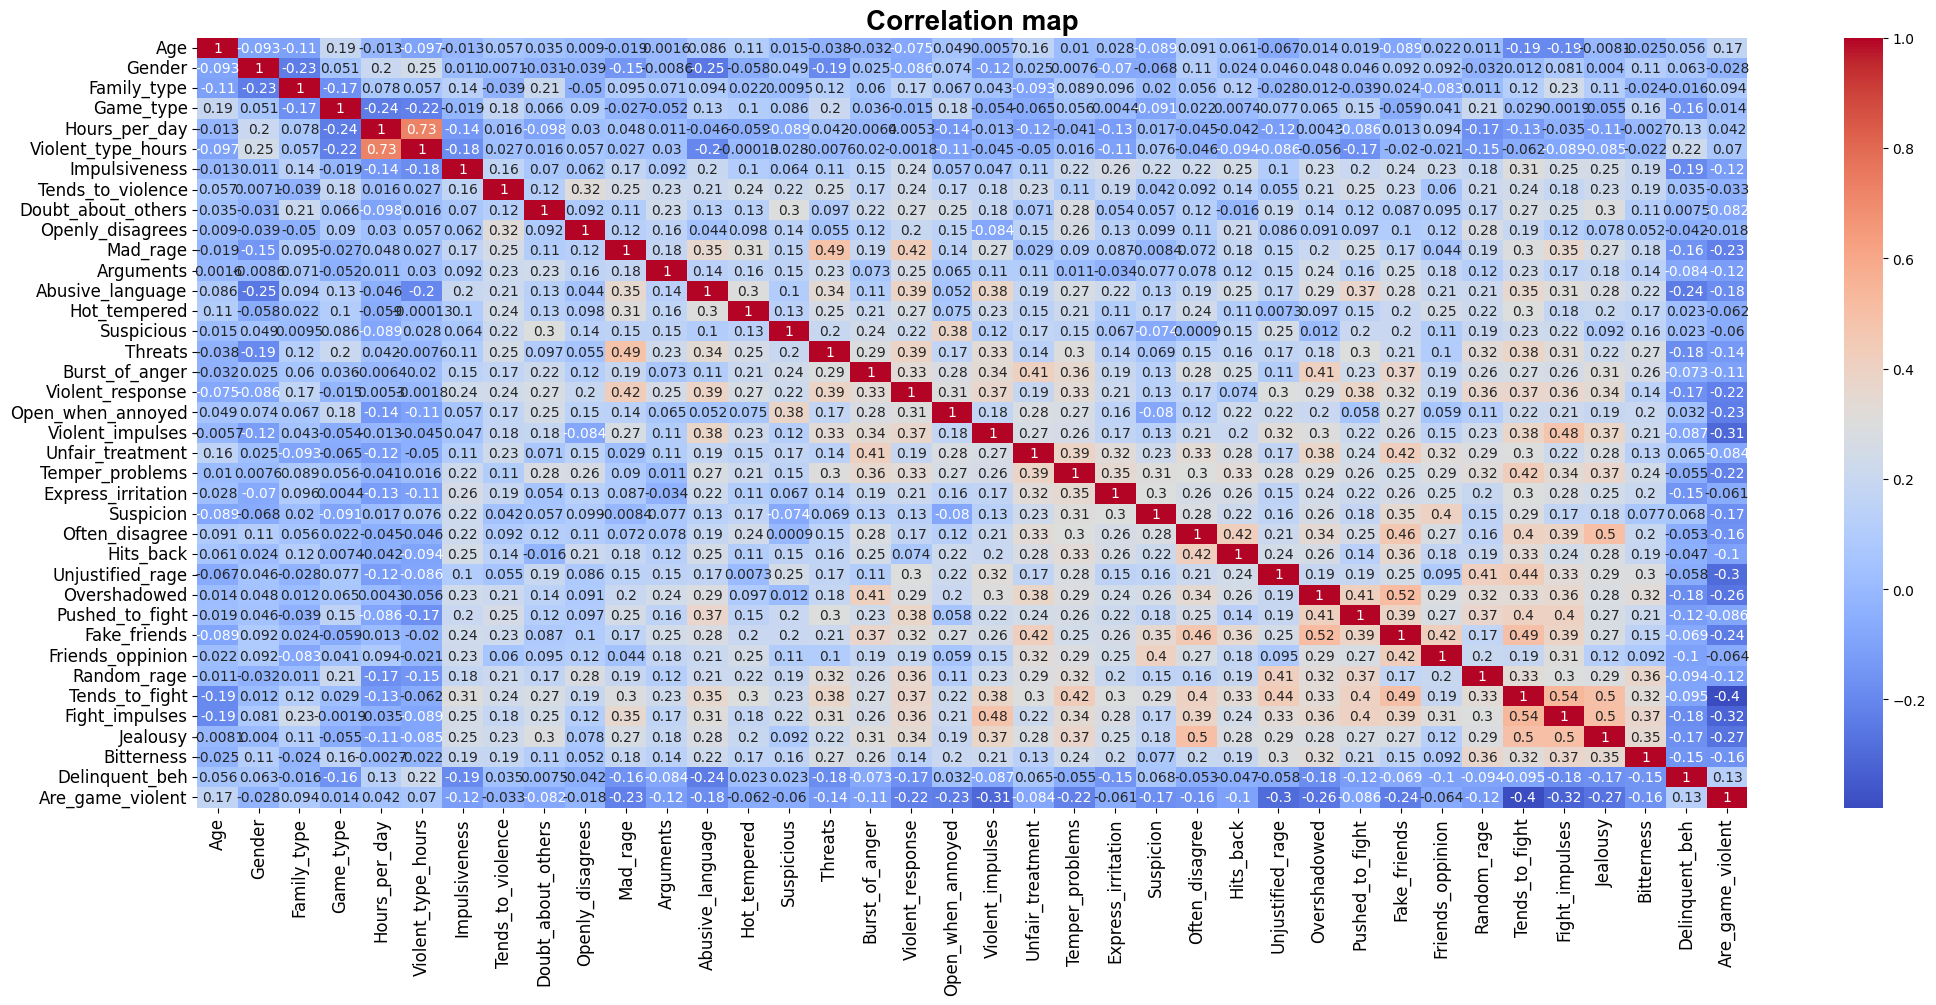

In [51]:
corr = df.corr()

plt.figure(figsize=(25,10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Correlation map', fontsize = 20, fontweight='bold', **csfont)

#### From the correlation map, we can see that none of the columns present a correlation higher than 0.9 (or lower than -0.9) between them or with the target column, which can indicate us what columns we can drop.

#### We can also perform a Chi-Square Test to evaluate which columns have a significant relationship with the target

In [53]:
target_col = 'Are_game_violent'   # Define the target column
features = [col for col in df.columns if col != target_col]

# Function to perform chi-square test
def chi_square_test(data, target):
    results = {}  # Store results
    for col in data.columns:
        if col != target:
            # Create contingency table
            contingency_table = pd.crosstab(data[col], data[target])
            
            # Perform chi-square test
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            
            # Store results
            results[col] = {'chi2': chi2, 'p-value': p}
    
    return results  # Make sure to return the dictionary

# Run the Chi-Square Test
from scipy.stats import chi2_contingency
chi_square_results = chi_square_test(df, target_col)

from colorama import Fore, Style
# Print Results
print("Chi-Square Test Results: \n")
print("===" * 22)

for feature, result in tqdm(chi_square_results.items(), desc = 'Processing rows'):
    chi2_value = result['chi2']
    p_value = result['p-value']

    # Check if Chi2 is positive or negative and set color
    if p_value < 0.05:
        color = Fore.GREEN
    else:
        color = Fore.RED

    # Print the result with color
    print(color + f"{feature}: Chi2 = {chi2_value:.4f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"   {feature} is significantly associated with the target column.")
    else:
        print(f"   {feature} is NOT significantly associated with the target column.")

    # Reset color and print separator
    print(Style.RESET_ALL + "===" * 22)

Chi-Square Test Results: 



Processing rows: 100%|██████████████████████████████████████████████████████████████| 37/37 [00:00<00:00, 37091.12it/s]

Age: Chi2 = 3.3308, p-value = 0.0680
   Age is NOT significantly associated with the target column.
Gender: Chi2 = 0.0198, p-value = 0.8882
   Gender is NOT significantly associated with the target column.
Family_type: Chi2 = 1.9468, p-value = 0.3778
   Family_type is NOT significantly associated with the target column.
Game_type: Chi2 = 30.7698, p-value = 0.0213
   Game_type is significantly associated with the target column.
Hours_per_day: Chi2 = 2.1179, p-value = 0.7141
   Hours_per_day is NOT significantly associated with the target column.
Violent_type_hours: Chi2 = 3.3094, p-value = 0.5074
   Violent_type_hours is NOT significantly associated with the target column.
Impulsiveness: Chi2 = 2.5534, p-value = 0.6351
   Impulsiveness is NOT significantly associated with the target column.
Tends_to_violence: Chi2 = 0.8994, p-value = 0.9246
   Tends_to_violence is NOT significantly associated with the target column.
Doubt_about_others: Chi2 = 6.2878, p-value = 0.1787
   Doubt_about_othe

### Hours of gaming vs Hours of violent gaming

#### Let's make a contingency table (similar to a confusion matrix) to explore the relation between the Hours per day playing VG and the Hours per day playing violent games:

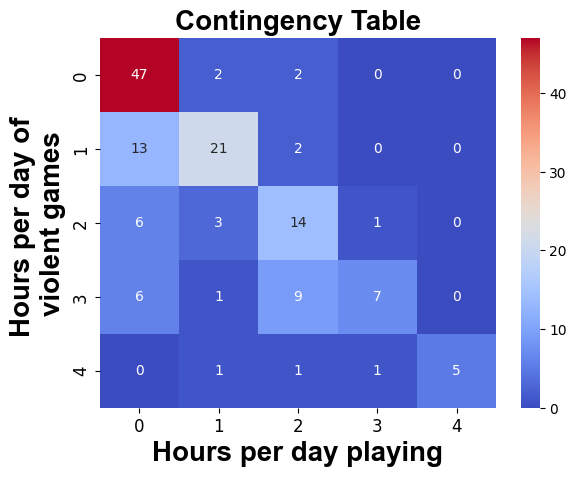

In [55]:
contingency_table = pd.crosstab(df['Hours_per_day'], df['Violent_type_hours'])
sns.heatmap(contingency_table, annot=True, cmap="coolwarm")
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Hours per day playing', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Hours per day of \nviolent games', fontsize = 20, fontweight='bold', **csfont)
plt.title('Contingency Table', fontsize = 20, fontweight='bold', **csfont)
plt.show()

#### When plotting the contingency table into a heatmap, we  can see that the subjects playing the minimum hours per day tend to play non-violent games (47 of them). The clustering in the diagonal indicates that there is a correlation (as we already knew) between the time spent playing video games overall and violent games specifically. For example, the player that spend more hours playing in general are more likely to also spend significant time on violent games. 

#### We can also see that there is a low occurrence of high hours for both categories, since few players fall into the high-hour range for both columns, and there is a dominance of "casual gaming" where a large proportion of the subjects spend fewer hours on video games overall and specifically on violent games.

#### Finally, we can see some 'anomalies' in the map, since there are small but noticeable instances where players spend significant hours on overall gaming but very little or no time on violent games.

#### We can also explore this data with histograms and density plots:

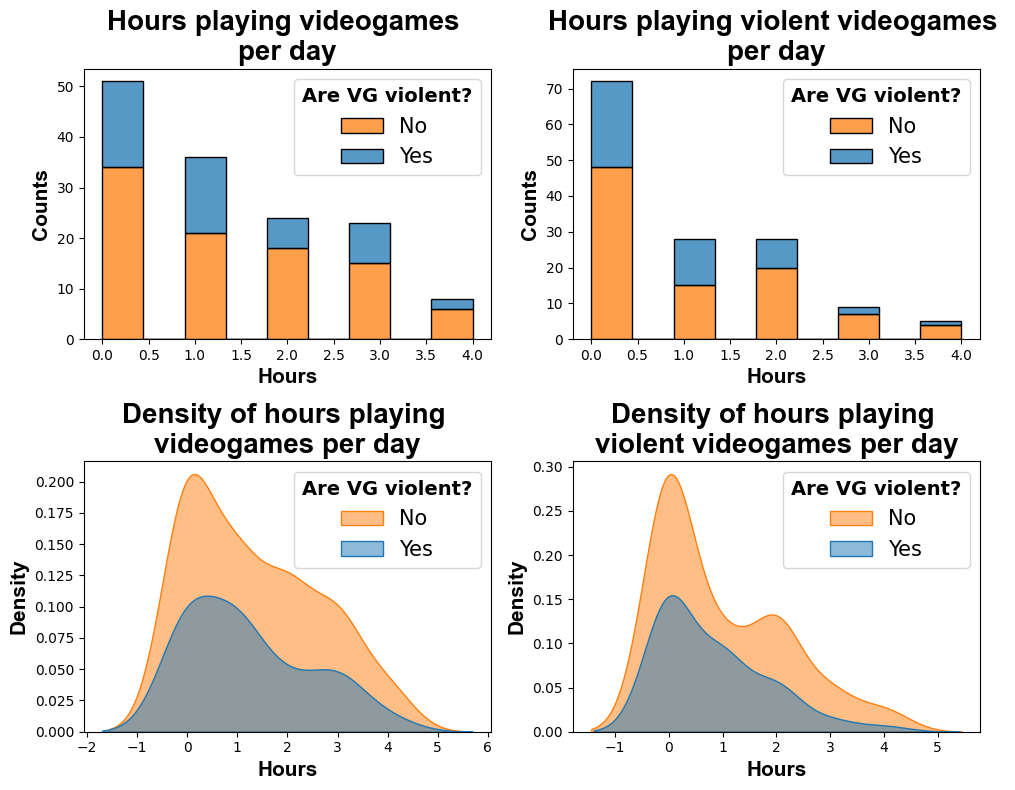

In [198]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=False)

sns.histplot(data=df, x='Hours_per_day', hue='Are_game_violent', multiple='stack', kde=False, ax=axes[0, 0])
axes[0, 0].set_title("Hours playing videogames \nper day", fontsize=20, fontweight='bold', **csfont)
axes[0, 0].set_xlabel("Hours", fontsize=15, fontweight='bold', **csfont)
axes[0, 0].set_ylabel("Counts", fontsize=15, fontweight='bold', **csfont)
axes[0, 0].legend(['No', 'Yes'], fontsize=15, ncol=1, title='Are VG violent?', title_fontsize=14)
axes[0, 0].get_legend().get_title().set_fontweight('bold')

sns.histplot(data=df, x='Violent_type_hours', hue='Are_game_violent', multiple='stack', kde=False, ax=axes[0, 1])
axes[0, 1].set_title("Hours playing violent videogames \nper day", fontsize=20, fontweight='bold', **csfont)
axes[0, 1].set_xlabel("Hours", fontsize=15, fontweight='bold', **csfont)
axes[0, 1].set_ylabel("Counts", fontsize=15, fontweight='bold', **csfont)
axes[0, 1].legend(['No', 'Yes'], fontsize=15, ncol=1, title='Are VG violent?', title_fontsize=14)
axes[0, 1].get_legend().get_title().set_fontweight('bold')

sns.kdeplot(data=df, x='Hours_per_day', hue='Are_game_violent', fill=True, alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title("Density of hours playing \nvideogames per day", fontsize=20, fontweight='bold', **csfont)
axes[1, 0].set_xlabel("Hours", fontsize=15, fontweight='bold', **csfont)
axes[1, 0].set_ylabel("Density", fontsize=15, fontweight='bold', **csfont)
axes[1, 0].legend(['No', 'Yes'], fontsize=15, ncol=1, title='Are VG violent?', title_fontsize=14)
axes[1, 0].get_legend().get_title().set_fontweight('bold')

sns.kdeplot(data=df, x='Violent_type_hours', hue='Are_game_violent', fill=True, alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Density of hours playing \nviolent videogames per day", fontsize=20, fontweight='bold', **csfont)
axes[1, 1].set_xlabel("Hours", fontsize=15, fontweight='bold', **csfont)
axes[1, 1].set_ylabel("Density", fontsize=15, fontweight='bold', **csfont)
axes[1, 1].legend(['No', 'Yes'], fontsize=15, ncol=1, title='Are VG violent?', title_fontsize=14)
axes[1, 1].get_legend().get_title().set_fontweight('bold')

plt.tight_layout()

#### The histograms provide a clear count of individuals in each hour range, making it easy to see the concentration of player at lower hours. The density plots offer a smoother representation of the distribution, highlighting the overall shape and overlap between the 'Yes' and 'No' groups. As we can see, the density plots are more useful to see the anomalies in the data.. We can obtain similar conclusions that the ones from the Contingency Table:

#### 1 - There is a correlation between overall and violent gaming; people who play more video games in general also tend to play more violent videogames. This is visually confirmed by the histograms and density plots, where the distributions for 'hours playing violent video games' shift to higher hours for those who play more overall.

#### 2 - There's a dominance of casual gaming, since both histograms show a high concentration of players at lower hour ranges. The density plots further emphasize this, with higher peaks around the lower hours). 

#### 3 - We can see some 'anomalies' in the players with high overall gaming but low violent gaming. These subjects are less apparent in the histogram, but can be inferred from the density plots. While the overlap between the 'Yes' and 'No' densities is substantial, there's still a noticeable portion of the 'No' density that extends into higher hour ranges, indicating players who spend considerable time gaming but primarily on non-violent games.

#### 4 - The data is also split by whether the subjects believe video games are violent or not. Interestingly, the distribution of playing time (overall and violent) are quite similar regardless of this belief, suggesting that the amount of gaming isn't strongly influenced by the perception of game violence. In other words, people who believe games are violent do not necessarily play more or fewer violent games than those who don't.


### Feeling overshadowed and feeling of fake friends

#### From the correlation map we can see that there is a relation between the subjects feeling that they can be overshadowed and feeling that their friends may be fake friends, so let's explore this columns:

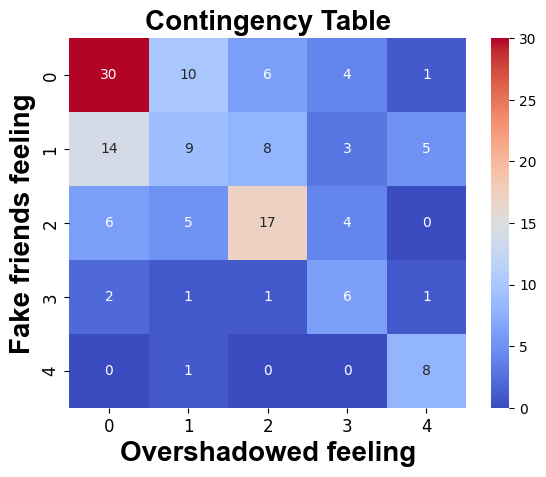

In [181]:
contingency_table = pd.crosstab(df['Overshadowed'], df['Fake_friends'])
sns.heatmap(contingency_table, annot=True, cmap="coolwarm")
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Overshadowed feeling', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Fake friends feeling', fontsize = 20, fontweight='bold', **csfont)
plt.title('Contingency Table', fontsize = 20, fontweight='bold', **csfont)
plt.show()

#### We can see that there is a diagonal clustering pattern, confirming the positive correlation between the two columns. Individuals who report higher levels of feeling overshadowed also tend to report higher levels of feeling like they have fake friends. There are 30 individuals that heavily feel that they have fake friends even though they do not feel overshadowed, as other 17 individuals that have the two feelings at medium levels. There are 8 subjects that feel completely overshadowed and with fake friends at the same time.

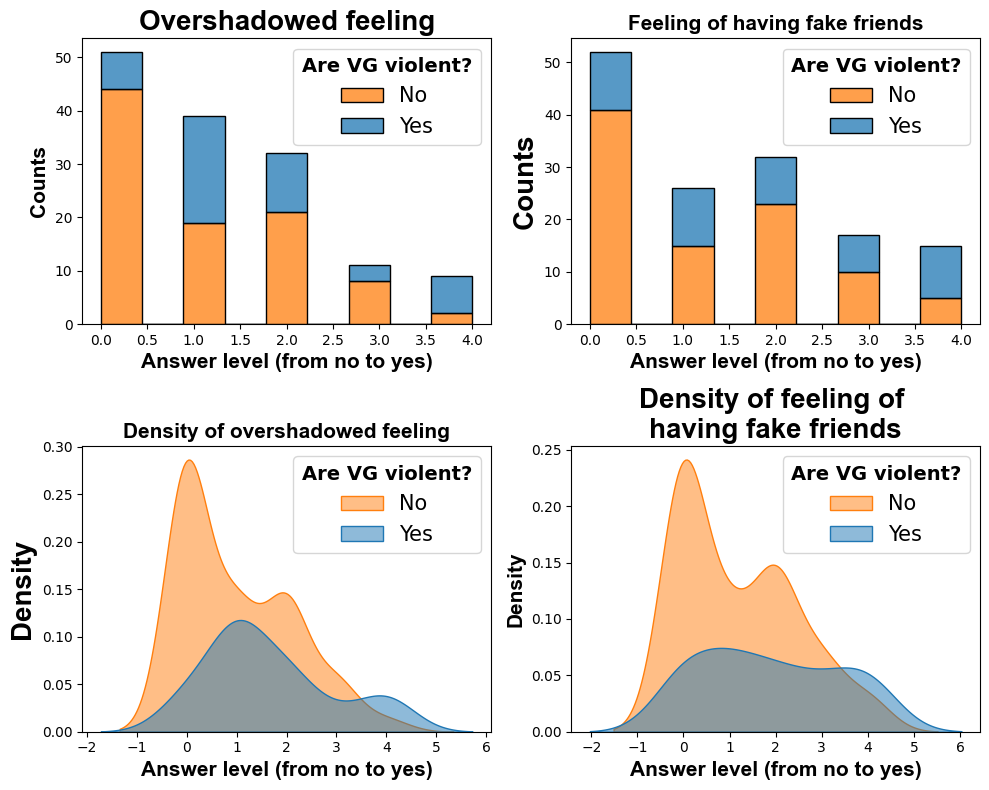

In [202]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=False)

sns.histplot(data=df, x='Overshadowed', hue='Are_game_violent', multiple='stack', kde=False, ax=axes[0, 0])
axes[0, 0].set_title("Overshadowed feeling", fontsize=20, fontweight='bold', **csfont)
axes[0, 0].set_xlabel("Answer level (from no to yes)", fontsize=15, fontweight='bold', **csfont)
axes[0, 0].set_ylabel("Counts", fontsize=15, fontweight='bold', **csfont)
axes[0, 0].legend(['No', 'Yes'], fontsize=15, ncol=1, title='Are VG violent?', title_fontsize=14)
axes[0, 0].get_legend().get_title().set_fontweight('bold')

sns.histplot(data=df, x='Fake_friends', hue='Are_game_violent', multiple='stack', kde=False, ax=axes[0, 1])
axes[0, 1].set_title("Feeling of having fake friends", fontsize=15, fontweight='bold', **csfont)
axes[0, 1].set_xlabel("Answer level (from no to yes)", fontsize=15, fontweight='bold', **csfont)
axes[0, 1].set_ylabel("Counts", fontsize=20, fontweight='bold', **csfont)
axes[0, 1].legend(['No', 'Yes'], fontsize=15, ncol=1, title='Are VG violent?', title_fontsize=14)
axes[0, 1].get_legend().get_title().set_fontweight('bold')

sns.kdeplot(data=df, x='Overshadowed', hue='Are_game_violent', fill=True, alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title("Density of overshadowed feeling", fontsize=15, fontweight='bold', **csfont)
axes[1, 0].set_xlabel("Answer level (from no to yes)", fontsize=15, fontweight='bold', **csfont)
axes[1, 0].set_ylabel("Density", fontsize=20, fontweight='bold', **csfont)
axes[1, 0].legend(['No', 'Yes'], fontsize=15, ncol=1, title='Are VG violent?', title_fontsize=14)
axes[1, 0].get_legend().get_title().set_fontweight('bold')

sns.kdeplot(data=df, x='Fake_friends', hue='Are_game_violent', fill=True, alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Density of feeling of \nhaving fake friends", fontsize=20, fontweight='bold', **csfont)
axes[1, 1].set_xlabel("Answer level (from no to yes)", fontsize=15, fontweight='bold', **csfont)
axes[1, 1].set_ylabel("Density", fontsize=15, fontweight='bold', **csfont)
axes[1, 1].legend(['No', 'Yes'], fontsize=15, ncol=1, title='Are VG violent?', title_fontsize=14)
axes[1, 1].get_legend().get_title().set_fontweight('bold')

plt.tight_layout()

#### From the graphs above, we can see that the group that does not believe that video games are violent show a higher density of answers towards the lower levels of this feeling, suggesting that individuals who do not perceive video games as violent are less likely to feel overshadowed. On the other hand, the group that think that video games are violent has a more spread-out distribution, with a higher density towards the higher levels of the answer, indicating that people who believe in video game violence are more likely to feel overshadowed. For the density plots, the 'No' is skewed towards the left, confirming their tendency to have a lower feeling of being overshadowed. The 'Yes' group is more centred, suggesting a wider range of answers and a higher likelihood of feeling overshadowed.

#### Like with the feeling of being overshadowed, the group that does not believe that video games are violent has a higher density at the lower levels of the answer in the study of the feeling of having fake friends. This suggest that they are less likely to feel like they have fake friends. The group that believes that video games are violent again shows a more spread-out distribution with a higher density towards the higher end, indicating a greater likelihood of feeling like they have fake friends. For the density plots, the 'no' group is again skewed towards the left, whilst the 'yes' group is more centred, mirroring the observation from the bar charts. 

### Tends to fight vs fight impulses

#### Now we will analyse the cases of individuals that tend to fight more than other people and the ones that feel the impulse to fight

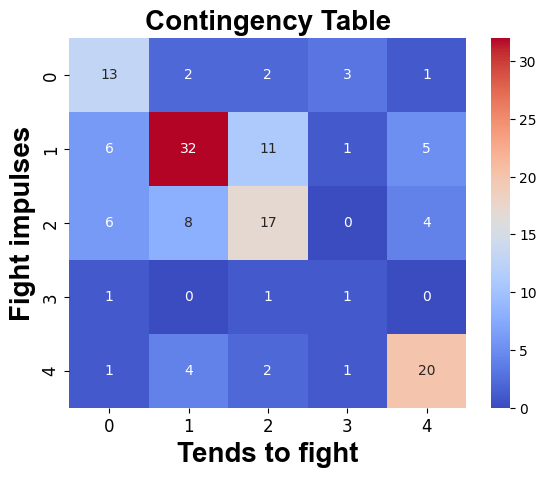

In [189]:
contingency_table = pd.crosstab(df['Tends_to_fight'], df['Fight_impulses'])
sns.heatmap(contingency_table, annot=True, cmap="coolwarm")
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Tends to fight', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Fight impulses', fontsize = 20, fontweight='bold', **csfont)
plt.title('Contingency Table', fontsize = 20, fontweight='bold', **csfont)
plt.show()

#### We can see from the contingency table that again we have a diagonal clustering pattern. The higher coincidence is from individuals that affirm with lower levels of confidence that tend to fight and the ones that show fight impulses also with lower levels of confidence, meaning that the majority of these individuals do not fight a lot and do not feel like hitting someone a lot. There are 17 individuals with higher certainties of these feelings in the middle of the table. There is a really high number of individuals (20) that affirm that they tend to fight with the highest confidence, and at the same time they feel fighting impulses at the same level, meaning that these individuals are more prone to fight than the rest of the subjects.

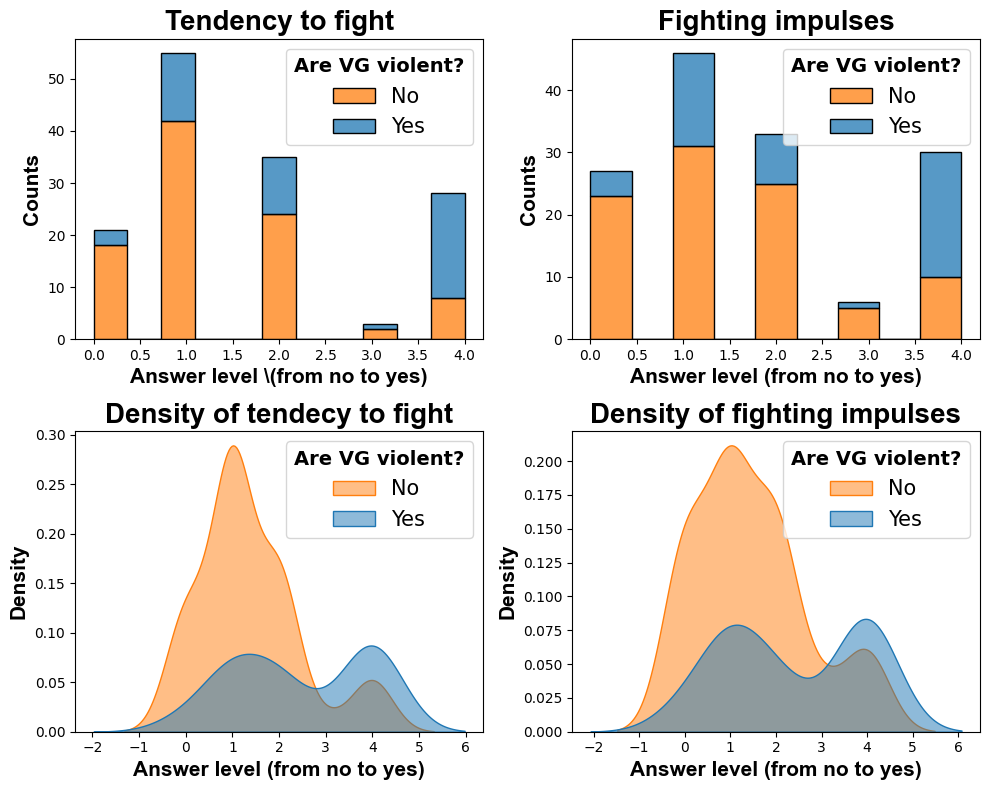

In [206]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=False)

sns.histplot(data=df, x='Tends_to_fight', hue='Are_game_violent', multiple='stack', kde=False, ax=axes[0, 0])
axes[0, 0].set_title("Tendency to fight", fontsize=20, fontweight='bold', **csfont)
axes[0, 0].set_xlabel("Answer level \(from no to yes)", fontsize=15, fontweight='bold', **csfont)
axes[0, 0].set_ylabel("Counts", fontsize=15, fontweight='bold', **csfont)
axes[0, 0].legend(['No', 'Yes'], fontsize=15, ncol=1, title='Are VG violent?', title_fontsize=14)
axes[0, 0].get_legend().get_title().set_fontweight('bold')

sns.histplot(data=df, x='Fight_impulses', hue='Are_game_violent', multiple='stack', kde=False, ax=axes[0, 1])
axes[0, 1].set_title("Fighting impulses", fontsize=20, fontweight='bold', **csfont)
axes[0, 1].set_xlabel("Answer level (from no to yes)", fontsize=15, fontweight='bold', **csfont)
axes[0, 1].set_ylabel("Counts", fontsize=15, fontweight='bold', **csfont)
axes[0, 1].legend(['No', 'Yes'], fontsize=15, ncol=1, title='Are VG violent?', title_fontsize=14)
axes[0, 1].get_legend().get_title().set_fontweight('bold')

sns.kdeplot(data=df, x='Tends_to_fight', hue='Are_game_violent', fill=True, alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title("Density of tendecy to fight", fontsize=20, fontweight='bold', **csfont)
axes[1, 0].set_xlabel("Answer level (from no to yes)", fontsize=15, fontweight='bold', **csfont)
axes[1, 0].set_ylabel("Density", fontsize=15, fontweight='bold', **csfont)
axes[1, 0].legend(['No', 'Yes'], fontsize=15, ncol=1, title='Are VG violent?', title_fontsize=14)
axes[1, 0].get_legend().get_title().set_fontweight('bold')

sns.kdeplot(data=df, x='Fight_impulses', hue='Are_game_violent', fill=True, alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Density of fighting impulses", fontsize=20, fontweight='bold', **csfont)
axes[1, 1].set_xlabel("Answer level (from no to yes)", fontsize=15, fontweight='bold', **csfont)
axes[1, 1].set_ylabel("Density", fontsize=15, fontweight='bold', **csfont)
axes[1, 1].legend(['No', 'Yes'], fontsize=15, ncol=1, title='Are VG violent?', title_fontsize=14)
axes[1, 1].get_legend().get_title().set_fontweight('bold')

plt.tight_layout()

#### The 'no' group shows a higher density of answers towards the left, suggesting that individuals who do not perceive video games as violent are less likely to feel like they tend to get into fights more than other individuals. Meanwhile, the 'yes' group has a more spread-out distribution, with a higher density towards the higher end of the answer level. This indicates that people who believe in video game violence are more likely to feel like they tend to get into fights more than other individuals. For the density plots, the 'no' group is skewed towards the left, confirming their tendency to have lower answer levels, whilst the 'yes' group is more centred, suggesting a wider range of answers and a higher likelihood of feeling a tendency to fight.

#### When analysing the fighting impulses, similar tendencies are observed. The 'no' group has a higher density on the left side, suggesting they are less likely to feel like they tend to feel like getting into fights more than usual. The 'yes' group again shows a more spread-out distribution with higher density towards the higher end, indicating a greater likelihood of feeling like they tend to feel to get into fights more than usual. The density plots show that the 'no' group is skewed towards the left, whilst the 'yes' group is more centred, mirroring again the observations from the bar charts.

### Fight impulses vs jealousy 

#### Finally, we will explore the relation between the fighting impulses of the individuals and the feelings of jealousy:


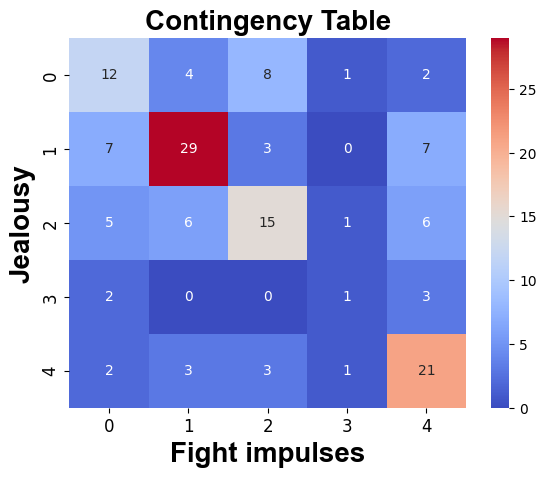

In [210]:
contingency_table = pd.crosstab(df['Fight_impulses'], df['Jealousy'])
sns.heatmap(contingency_table, annot=True, cmap="coolwarm")
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Fight impulses', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Jealousy', fontsize = 20, fontweight='bold', **csfont)
plt.title('Contingency Table', fontsize = 20, fontweight='bold', **csfont)
plt.show()

#### We confirm again the correlation between the two columns, since we can observe a diagonal clustering of the answers. The highest number of individuals (29) tend to have lower feeling of jealousy and lower feeling of fighting. At the same time, a high number of individuals (21) show high jealousy levels and high fighting impulses.

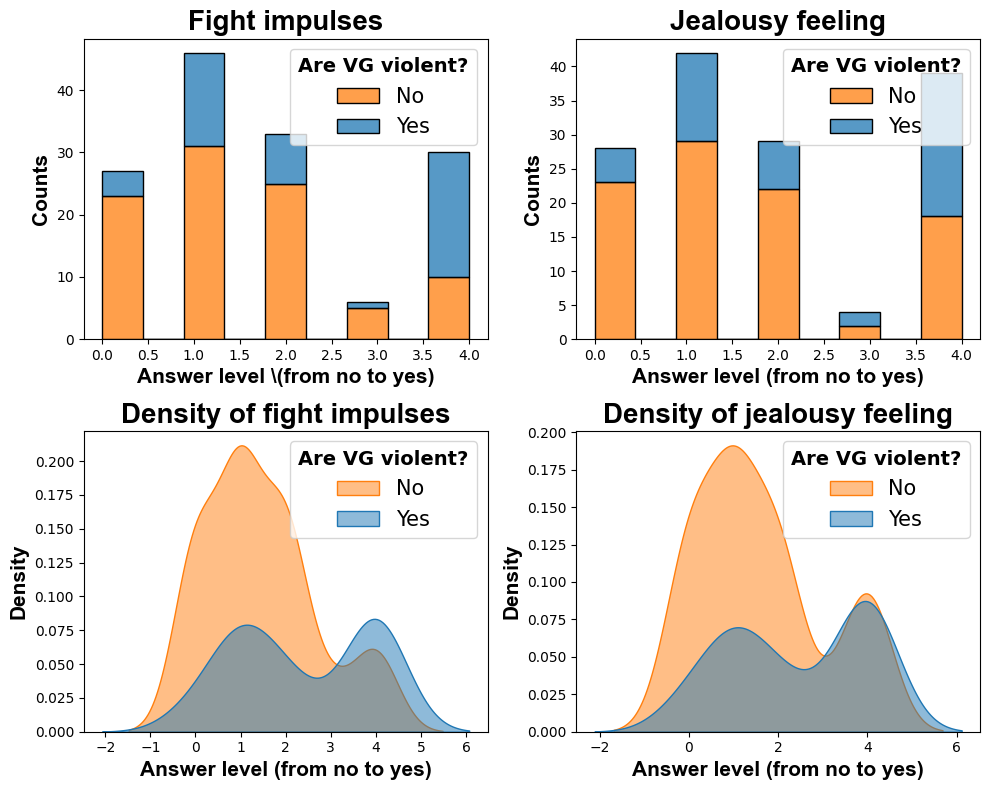

In [212]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=False)

sns.histplot(data=df, x='Fight_impulses', hue='Are_game_violent', multiple='stack', kde=False, ax=axes[0, 0])
axes[0, 0].set_title("Fight impulses", fontsize=20, fontweight='bold', **csfont)
axes[0, 0].set_xlabel("Answer level \(from no to yes)", fontsize=15, fontweight='bold', **csfont)
axes[0, 0].set_ylabel("Counts", fontsize=15, fontweight='bold', **csfont)
axes[0, 0].legend(['No', 'Yes'], fontsize=15, ncol=1, title='Are VG violent?', title_fontsize=14)
axes[0, 0].get_legend().get_title().set_fontweight('bold')

sns.histplot(data=df, x='Jealousy', hue='Are_game_violent', multiple='stack', kde=False, ax=axes[0, 1])
axes[0, 1].set_title("Jealousy feeling", fontsize=20, fontweight='bold', **csfont)
axes[0, 1].set_xlabel("Answer level (from no to yes)", fontsize=15, fontweight='bold', **csfont)
axes[0, 1].set_ylabel("Counts", fontsize=15, fontweight='bold', **csfont)
axes[0, 1].legend(['No', 'Yes'], fontsize=15, ncol=1, title='Are VG violent?', title_fontsize=14)
axes[0, 1].get_legend().get_title().set_fontweight('bold')

sns.kdeplot(data=df, x='Fight_impulses', hue='Are_game_violent', fill=True, alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title("Density of fight impulses", fontsize=20, fontweight='bold', **csfont)
axes[1, 0].set_xlabel("Answer level (from no to yes)", fontsize=15, fontweight='bold', **csfont)
axes[1, 0].set_ylabel("Density", fontsize=15, fontweight='bold', **csfont)
axes[1, 0].legend(['No', 'Yes'], fontsize=15, ncol=1, title='Are VG violent?', title_fontsize=14)
axes[1, 0].get_legend().get_title().set_fontweight('bold')

sns.kdeplot(data=df, x='Jealousy', hue='Are_game_violent', fill=True, alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Density of jealousy feeling", fontsize=20, fontweight='bold', **csfont)
axes[1, 1].set_xlabel("Answer level (from no to yes)", fontsize=15, fontweight='bold', **csfont)
axes[1, 1].set_ylabel("Density", fontsize=15, fontweight='bold', **csfont)
axes[1, 1].legend(['No', 'Yes'], fontsize=15, ncol=1, title='Are VG violent?', title_fontsize=14)
axes[1, 1].get_legend().get_title().set_fontweight('bold')

plt.tight_layout()

#### The 'no' group has a higher density on the left side of the x-axis, suggesting they are less likely to feel jealous, whilst the 'yes' group shows a more spread-out distribution with a higher density towards the higher end of the x-axis, indicating greater a likelihood of feeling jealous. The density plots show a sweked distribution towards the left for the 'no' group, and a more centred distribution for the 'yes' group.

## Train/test split

In [63]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Let's see if the data is balanced

In [64]:
target = pd.Series(y_train).value_counts() # Naming the different diseases and counting how many times they appear in the column

dis_data = pd.DataFrame({'Violent': target.index,
                         'Counts': target.values}) # Store the information of the diseases into a DataFrame for a clearer view
print(dis_data) 

   Violent  Counts
0        1      76
1        0      37


Text(0.5, 0, 'Counts')

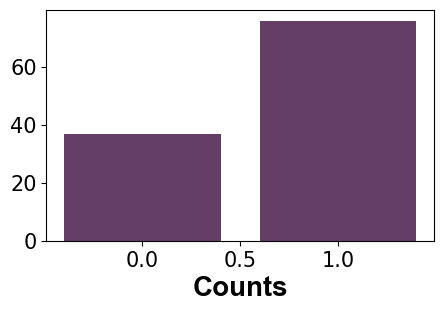

In [65]:
plt.figure(figsize=(5,3))
plt.bar(dis_data['Violent'], dis_data['Counts'], color = '#653e66')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Class/ASD', fontsize = 20, fontweight='bold', **csfont)
plt.xlabel('Counts', fontsize = 20, fontweight='bold', **csfont)

#### Unluckily for us, the data has a huge imbalance, so we will adress this problem.

In [66]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state = 19)
X_train, y_train = ROS.fit_resample(X_train, y_train)

In [67]:
target = pd.Series(y_train).value_counts() # Naming the different diseases and counting how many times they appear in the column

dis_data = pd.DataFrame({'Violent': target.index,
                         'Counts': target.values}) # Store the information of the diseases into a DataFrame for a clearer view
print(dis_data) 

   Violent  Counts
0        0      76
1        1      76


Text(0.5, 0, 'Counts')

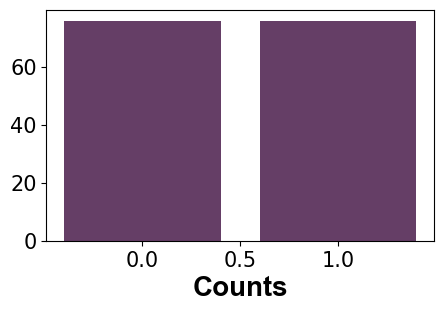

In [68]:
plt.figure(figsize=(5,3))
plt.bar(dis_data['Violent'], dis_data['Counts'], color = '#653e66')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Class/ASD', fontsize = 20, fontweight='bold', **csfont)
plt.xlabel('Counts', fontsize = 20, fontweight='bold', **csfont)

#### Now that our data is balanced, we can select a model and train it.

## Model Selection

#### Since we are dealing with a binary-type prediction (remember we want to predict if the subject thinks video games are violent, not if a video game is violent), we can use different classification models. Unfortunately for us, we have a very low number of data to feed our models. For this reason, I would not expect a high performance of the models. Let's see how they behave:

### Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

LogisticRegression()

Accuracy Score (Logistic Regression model): 48.275862068965516 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

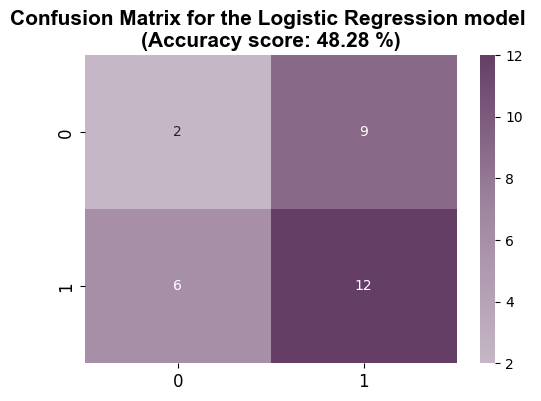

In [72]:
lr_ypred = classifier_lr.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy Score (Logistic Regression model):", accuracy_score(y_test, lr_ypred)*100, "%") # Print the accuracy score for the predictions

cm_lr = confusion_matrix(y_test, lr_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Logistic Regression model \n(Accuracy score: {accuracy_score(y_test, lr_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

### K-Nearest Neighbors

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

classifier_kn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Initialise a standard KNN classifier

param_grid = {'n_neighbors': range(1,21)}  # Define the range of neighbors to test
grid_search = GridSearchCV(estimator = classifier_kn, param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
optimal_neighbors = grid_search.best_params_['n_neighbors']  # extract the optimal number of neighbors
best_score = grid_search.best_score_
print(f"Optimal number of neighbors: {optimal_neighbors}")
print(f"Best cross-validation accuracy: {best_score}")

classifier_kn = KNeighborsClassifier(n_neighbors = optimal_neighbors, metric = 'minkowski', p = 2) # Redo the KNN clasiffier with optimal neighbors
classifier_kn.fit(X_train, y_train)

Optimal number of neighbors: 1
Best cross-validation accuracy: 0.7972043010752689


KNeighborsClassifier(n_neighbors=1)

Accuracy Score (K-Nearest Neighbors model): 44.827586206896555 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

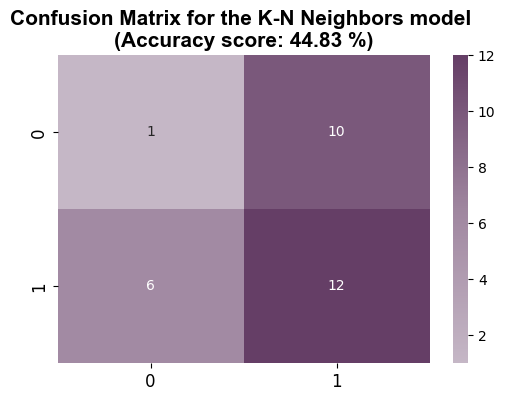

In [75]:
kn_ypred = classifier_kn.predict(X_test)

print("Accuracy Score (K-Nearest Neighbors model):", accuracy_score(y_test, kn_ypred)*100, "%") # Print the accuracy score for the predictions

cm_kn = confusion_matrix(y_test, kn_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_kn, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the K-N Neighbors model \n(Accuracy score: {accuracy_score(y_test, kn_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

### Support Vector Machine

In [77]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 19)
classifier_svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=19)

Accuracy Score (Support Vector Machine model): 48.275862068965516 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

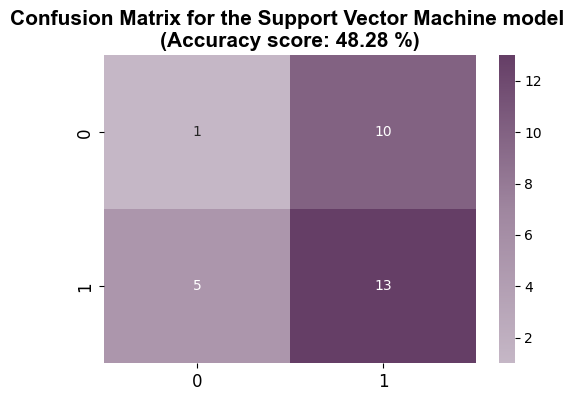

In [78]:
svc_ypred = classifier_svc.predict(X_test)

print("Accuracy Score (Support Vector Machine model):", accuracy_score(y_test, svc_ypred)*100, "%") # Print the accuracy score for the predictions

cm_svc = confusion_matrix(y_test, svc_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svc, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Support Vector Machine model \n(Accuracy score: {accuracy_score(y_test, svc_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

### Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

Accuracy Score (Naive Bayes model): 65.51724137931035 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

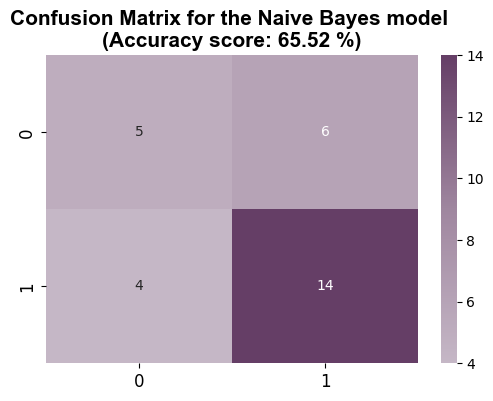

In [81]:
nb_ypred = classifier_nb.predict(X_test)

print("Accuracy Score (Naive Bayes model):", accuracy_score(y_test, nb_ypred)*100, "%") # Print the accuracy score for the predictions

cm_nb = confusion_matrix(y_test, nb_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Naive Bayes model \n(Accuracy score: {accuracy_score(y_test, nb_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

### Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Accuracy Score (Decision Tree model): 48.275862068965516 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

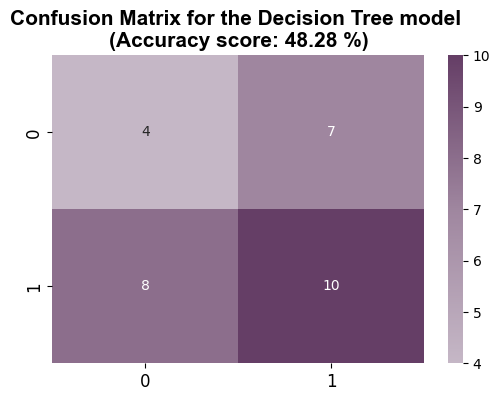

In [84]:
dt_ypred = classifier_dt.predict(X_test)

print("Accuracy Score (Decision Tree model):", accuracy_score(y_test, dt_ypred)*100, "%") # Print the accuracy score for the predictions

cm_dt = confusion_matrix(y_test, dt_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Decision Tree model \n(Accuracy score: {accuracy_score(y_test, dt_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

### Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Accuracy Score (Random Forest model): 65.51724137931035 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

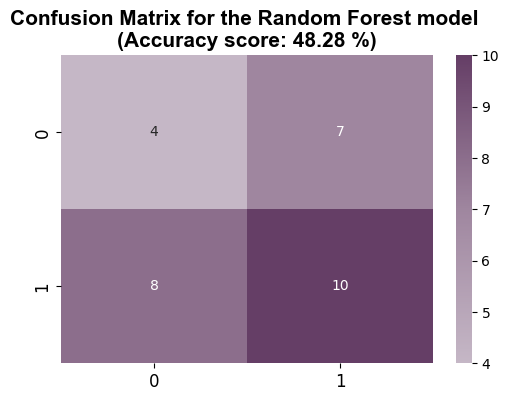

In [87]:
rf_ypred = classifier_rf.predict(X_test)

print("Accuracy Score (Random Forest model):", accuracy_score(y_test, nb_ypred)*100, "%") # Print the accuracy score for the predictions

cm_rf = confusion_matrix(y_test, rf_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Random Forest model \n(Accuracy score: {accuracy_score(y_test, rf_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

### XGBoost

In [89]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy Score (XGBoost model): 48.275862068965516 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

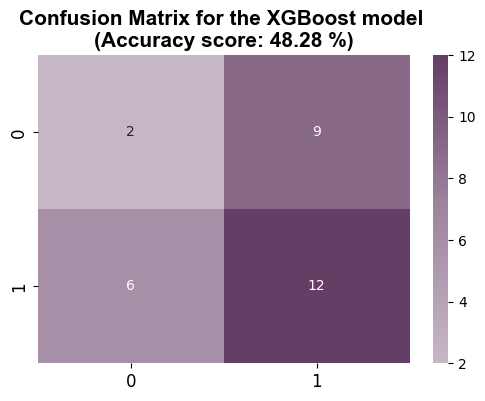

In [90]:
xg_ypred = classifier_xg.predict(X_test)

print("Accuracy Score (XGBoost model):", accuracy_score(y_test, xg_ypred)*100, "%") # Print the accuracy score for the predictions

cm_xg = confusion_matrix(y_test, xg_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xg, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the XGBoost model \n(Accuracy score: {accuracy_score(y_test, xg_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

### Artificial Neural Network

In [92]:
import tensorflow as tf
tf.__version__

'2.16.1'

In [93]:
ann = tf.keras.models.Sequential()


ann.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))     # Add an input layer
ann.add(tf.keras.layers.Dense(units = 9, activation = 'relu'))      # Add a hidden layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))   # Add the final output layer (sigmoid because the output is binary)
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])   # Compile the ANN

ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [94]:
ann.fit(X_train, y_train, batch_size = 10, epochs = 3)

Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4967 - loss: 0.7372
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4894 - loss: 0.7012 
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6225 - loss: 0.6344 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Accuracy Score (ANN model): 48.275862068965516 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

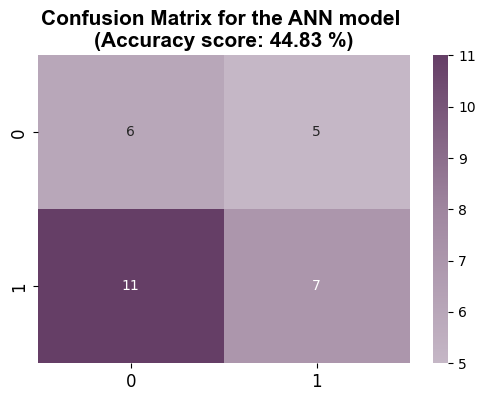

In [95]:
ann_ypred = ann.predict(X_test)
ann_ypred = (ann_ypred > 0.5)

print("Accuracy Score (ANN model):", accuracy_score(y_test, xg_ypred)*100, "%") # Print the accuracy score for the predictions

cm_ann = confusion_matrix(y_test, ann_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_ann, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the ANN model \n(Accuracy score: {accuracy_score(y_test, ann_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Model Performance

In [97]:
print('=='*15)
print('Model: Logistic Regression')
print(f'Accuracy score: {accuracy_score(y_test, lr_ypred)*100:.2f} %')

print('=='*15)
print('Model: K-Nearest Neighbors')
print(f'Accuracy score: {accuracy_score(y_test, kn_ypred)*100:.2f} %')

print('=='*15)
print('Model: Support Vector Machine')
print(f'Accuracy score: {accuracy_score(y_test, svc_ypred)*100:.2f} %')

print('=='*15)
print('Model: Naive Bayes')
print(f'Accuracy score: {accuracy_score(y_test, nb_ypred)*100:.2f} %')

print('=='*15)
print('Model: Decision Tree')
print(f'Accuracy score: {accuracy_score(y_test, dt_ypred)*100:.2f} %')

print('=='*15)
print('Model: Random Forest')
print(f'Accuracy score: {accuracy_score(y_test, rf_ypred)*100:.2f} %')

print('=='*15)
print('Model: XGBoost')
print(f'Accuracy score: {accuracy_score(y_test, xg_ypred)*100:.2f} %')

print('=='*15)
print('Model: Artificial Neural Network')
print(f'Accuracy score: {accuracy_score(y_test, ann_ypred)*100:.2f} %')

Model: Logistic Regression
Accuracy score: 48.28 %
Model: K-Nearest Neighbors
Accuracy score: 44.83 %
Model: Support Vector Machine
Accuracy score: 48.28 %
Model: Naive Bayes
Accuracy score: 65.52 %
Model: Decision Tree
Accuracy score: 48.28 %
Model: Random Forest
Accuracy score: 48.28 %
Model: XGBoost
Accuracy score: 48.28 %
Model: Artificial Neural Network
Accuracy score: 44.83 %


#### As expected, the majority of the models do not even reach a 50% of accuracy, since the data to train the models is very low (even lower when we split it in order to obtain the train and test sets).

#### Interestingly, we can see that the best performance is given by the Naive Bayes model. This result makes sense since Naive Bayes is known for being robust when working with smaller datasets because of it is simpler and requires fewer training data to make generalisations compared to more complex models, such as XGBoost or KNN. Given that we only have 147 rows in our dataset, this might be a clear indicator of why Naive Bayes outperforms our other models, since simpler models are less prone to overfitting when data is scarce.